In [1]:
from tqdm import tqdm_notebook

## learning_rate 에 따른 학습
> * Case1 : learning_rate = 0.1 
* Case2 : learning_rate = 1.5
* Case3 : learning_rate = 1e-5

### Case1 : learning_rate = 0.1

In [3]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

learning_rate = 0.1

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.math.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [4]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(201)):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 3.0203847885131836 
 Weight : 
[[-0.17754334 -0.78997195 -0.04304576]
 [-1.5027626   0.48516145 -1.071294  ]
 [ 0.30098546 -0.8247319  -0.01561223]]

 Step : 20 
 Cost : 1.216780662536621 
 Weight : 
[[-0.4375412  -0.77220863  0.19918884]
 [-1.0890027  -0.05018669 -0.9497054 ]
 [ 0.1900083  -0.5525086  -0.17685825]]

 Step : 40 
 Cost : 0.9577064514160156 
 Weight : 
[[-0.6784514  -0.7165572   0.38444754]
 [-0.85323054 -0.36418664 -0.8714775 ]
 [ 0.05116941 -0.23401435 -0.35651356]]

 Step : 60 
 Cost : 0.8223516941070557 
 Weight : 
[[-0.8782285  -0.6705325   0.5381999 ]
 [-0.70902747 -0.5678387  -0.81202847]
 [-0.01299538 -0.03458347 -0.4917797 ]]

 Step : 80 
 Cost : 0.7558510899543762 
 Weight : 
[[-1.043373   -0.6384493   0.6712613 ]
 [-0.63382375 -0.6737964  -0.7812743 ]
 [-0.02247061  0.06562337 -0.5825114 ]]

 Step : 100 
 Cost : 0.7156873941421509 
 Weight : 
[[-1.1844605  -0.6150593   0.7889591 ]
 [-0.5953213  -0.72242665 -0.77114636]
 [-0.00510452  0.1102

### Case2 : learning_rate = 1.5

In [6]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1.5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [7]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0 or step<5:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))
    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 3.945857524871826 
 Weight : 
[[-0.2368362   0.6412566  -0.09345132]
 [-2.582366    4.519682    1.7531003 ]
 [-2.9232774   1.2354764   1.9879432 ]]

 Step : 1 
 Cost : 21.469520568847656 
 Weight : 
[[ 0.1381638  -0.28146142  0.45426673]
 [-0.14486599  0.6122863   3.2229962 ]
 [-0.48577738 -2.4441977   3.230117  ]]

 Step : 2 
 Cost : 28.177921295166016 
 Weight : 
[[ 0.5131634   0.28103817 -0.48323244]
 [ 2.2926333   3.2372854  -1.8395019 ]
 [ 1.9517221   0.36830187 -2.019882  ]]

 Step : 3 
 Cost : 9.0123291015625 
 Weight : 
[[-0.24094301  0.47264472  0.07926732]
 [-0.50024056  4.5301595  -0.33950233]
 [-1.2259152   2.2334397  -0.7073822 ]]

 Step : 4 
 Cost : 21.952831268310547 
 Weight : 
[[ 0.13405696 -0.46485475  0.6417668 ]
 [ 1.9372594   0.5926604   1.1604966 ]
 [ 1.2115848  -1.5165596   0.6051173 ]]

 Step : 20 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 Step : 40 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan

### Case3 : learning_rate = 1e-5

In [8]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1e-5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 6.003984451293945 
 Weight : 
[[ 0.04672125 -2.214816    1.7723497 ]
 [-2.3809586   0.26667655 -0.5788484 ]
 [-1.046504    0.05560379 -0.857442  ]]

 Step : 20 
 Cost : 6.000621795654297 
 Weight : 
[[ 0.04677109 -2.2149115   1.772395  ]
 [-2.3806343   0.26622456 -0.57872087]
 [-1.0461798   0.05515679 -0.8573201 ]]

 Step : 40 
 Cost : 5.997260093688965 
 Weight : 
[[ 0.04682093 -2.2150068   1.7724403 ]
 [-2.38031     0.26577276 -0.5785933 ]
 [-1.0458555   0.0547099  -0.8571985 ]]

 Step : 60 
 Cost : 5.993899345397949 
 Weight : 
[[ 0.04687078 -2.2151022   1.7724832 ]
 [-2.3799858   0.26532096 -0.57846576]
 [-1.0455313   0.05426313 -0.8570769 ]]

 Step : 80 
 Cost : 5.990540504455566 
 Weight : 
[[ 0.04692062 -2.2151976   1.7725261 ]
 [-2.3796616   0.26486915 -0.57833844]
 [-1.045207    0.05381648 -0.8569553 ]]

 Step : 100 
 Cost : 5.987183570861816 
 Weight : 
[[ 0.04697047 -2.215293    1.7725691 ]
 [-2.3793373   0.26441735 -0.5782121 ]
 [-1.0448828   0.05336994 

### Non-normalized inputs
> Linear regression without min, max
* 너무나 심플하고 멋진 모델임에도 불구하고 학습해보면 NaN 이 발생
* 해결방안 : Nomalized 한다거나, MinMaxScaler 함수 사용

In [10]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777) 

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 x_data : 
[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]  

 y_data : 
[[831.659973]
 [828.070007]
 [824.159973]
 [819.23999 ]
 [818.97998 ]
 [820.450012]
 [813.669983]
 [809.559998]]


In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("Step : {}, \t Cost : {}".format(step, cost_val))

Step : 0, 	 Cost : 1288165261312.0
Step : 1, 	 Cost : 1.4152820192956359e+27
Step : 2, 	 Cost : inf
Step : 3, 	 Cost : inf
Step : 4, 	 Cost : inf
Step : 5, 	 Cost : inf
Step : 6, 	 Cost : nan
Step : 7, 	 Cost : nan
Step : 8, 	 Cost : nan
Step : 9, 	 Cost : nan
Step : 10, 	 Cost : nan
Step : 11, 	 Cost : nan
Step : 12, 	 Cost : nan
Step : 13, 	 Cost : nan
Step : 14, 	 Cost : nan
Step : 15, 	 Cost : nan
Step : 16, 	 Cost : nan
Step : 17, 	 Cost : nan
Step : 18, 	 Cost : nan
Step : 19, 	 Cost : nan
Step : 20, 	 Cost : nan
Step : 21, 	 Cost : nan
Step : 22, 	 Cost : nan
Step : 23, 	 Cost : nan
Step : 24, 	 Cost : nan
Step : 25, 	 Cost : nan
Step : 26, 	 Cost : nan
Step : 27, 	 Cost : nan
Step : 28, 	 Cost : nan
Step : 29, 	 Cost : nan
Step : 30, 	 Cost : nan
Step : 31, 	 Cost : nan
Step : 32, 	 Cost : nan
Step : 33, 	 Cost : nan
Step : 34, 	 Cost : nan
Step : 35, 	 Cost : nan
Step : 36, 	 Cost : nan
Step : 37, 	 Cost : nan
Step : 38, 	 Cost : nan
Step : 39, 	 Cost : nan
Step : 40, 	 Cost :

### Linear regression with min, max

In [12]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [13]:
np.min(a)

0

In [14]:
np.min(a, axis=0)

array([0, 1])

In [15]:
np.min(a, axis=1)

array([0, 2])

In [ ]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

def MinMaxScaler(data):
    numerator = data-np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}")

### 손글씨 숫자데이터

In [17]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


### Training epoch / batch

In [19]:
mnist.train.num_examples


55000

Epoch: 0001	Cost = 2.791586801
Epoch: 0002	Cost = 1.072621038
Epoch: 0003	Cost = 0.848396162
Epoch: 0004	Cost = 0.743733543
Epoch: 0005	Cost = 0.679391309
Epoch: 0006	Cost = 0.633294273
Epoch: 0007	Cost = 0.598677966
Epoch: 0008	Cost = 0.570822526
Epoch: 0009	Cost = 0.548126380
Epoch: 0010	Cost = 0.528871997
Epoch: 0011	Cost = 0.512251964
Epoch: 0012	Cost = 0.497253384
Epoch: 0013	Cost = 0.484525664
Epoch: 0014	Cost = 0.473563450
Epoch: 0015	Cost = 0.462728269

Learning finished
----------------------------------------------------------------
Accuracy:  0.8893
Label:  [9]
Prediction:  [9]


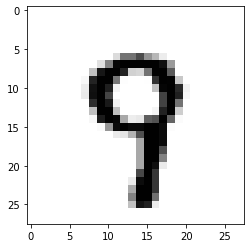

In [20]:
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in tqdm_notebook(range(training_epochs)):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        # print('Epoch:', '%04d' % (epoch + 1),
        #       '\t cost =', '{:.9f}'.format(avg_cost))
        print('Epoch:', '%04d' % (epoch + 1), end='\t')
        print('Cost =', '{:.9f}'.format(avg_cost))

        
    print("Learning finished")
    print("-"*2**6)

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()